In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn
import h5py

In [ ]:
!python -V

Python 3.7.10


In [ ]:
print(f"The version of Tensorflow: { tf.__version__}")

The version of Tensorflow: 2.4.1


In [ ]:
print(f"The version of Sklearn: {sklearn.__version__}")

The version of Sklearn: 0.22.2.post1


In [ ]:
print(f"The version of Pandas: {pd.__version__}")

The version of Pandas: 1.1.5


In [ ]:
print(f"The version of Numpy: {np.__version__}")

The version of Numpy: 1.19.5


In [ ]:
print(f"The version of h5py: {h5py.__version__}")

The version of h5py: 2.10.0


In [ ]:
folder_path = "drive/MyDrive/SIT764/Property/data/"
property_data = pd.read_csv(folder_path + 'cleaning_data.csv')
property_data

,Suburb,Suburb_Code,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Car,School,Shop,Restaurant,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Date,Last Sell Price,Sell Date,Sell Price
0,Armstrong Creek,1,539.0,176.000000,4.0,2.0,2.0,4,17,6,17,4,0,390.000000,0.0,2000-02-01,175000.0,2021-03-01,610000
1,Armstrong Creek,1,446.0,157.800253,4.0,2.0,2.0,5,9,7,14,3,0,800.847867,0.0,2019-04-01,545000.0,2021-03-01,645000
2,Armstrong Creek,1,398.0,161.000000,4.0,2.0,2.0,2,3,4,14,4,0,400.000000,0.0,2018-10-01,550000.0,2021-03-01,597500
3,Armstrong Creek,1,630.0,157.800253,4.0,2.0,4.0,2,4,4,14,3,0,800.847867,0.0,2014-03-01,207000.0,2021-03-01,841000
4,Armstrong Creek,1,449.0,170.000000,4.0,2.0,2.0,1,2,4,12,3,0,800.847867,0.0,2017-07-01,475000.0,2021-03-01,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938,Whittington,31,1405.0,157.800253,3.0,1.0,1.0,15,20,16,20,5,16,800.847867,0.0,2003-07-01,150000.0,2016-07-01,600000
10939,Whittington,31,581.0,157.800253,4.0,2.0,4.0,14,20,16,20,5,16,800.847867,0.0,2004-02-01,230000.0,2016-07-01,375000
10940,Whittington,31,645.0,122.000000,3.0,1.0,1.0,14,20,17,20,5,16,350.000000,0.0,2002-12-01,178000.0,2016-06-01,300000
10941,Whittington,31,774.0,157.800253,3.0,1.0,4.0,11,20,20,20,1,13,290.000000,0.0,2009-11-01,143000.0,2016-06-01,255000


# Pre-Processing Data

In [ ]:
#select Suburb, Land Size SQM, Building Size SQM, Bedrooms, Toilets, Car, "School, Shop, Station, Park, Hospital, Rent Amount PW, Auction, Last Sell Price as the input feature
columns = ["Suburb", "Land Size SQM", "Building Size SQM", "Bedrooms", "Toilets", "Car", "School", "Shop", "Station", "Park", "Hospital", "Rent Amount PW", "Auction", "Last Sell Price"]
X = property_data[columns]
#Select the columns Sell Price as the target
y = property_data["Sell Price"]


We will delete the outlier points by using Interquartile Range Method

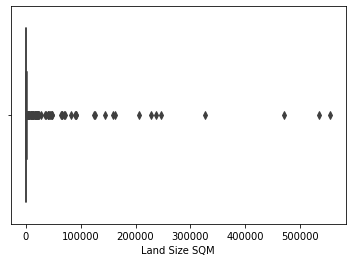

In [ ]:
import seaborn as sns
sns.boxplot(x=X["Land Size SQM"])

In [ ]:
Q1 = X["Land Size SQM"].quantile(0.25)
Q3 = X["Land Size SQM"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
X = X[X["Land Size SQM"] <= (Q3 + 1.5 * IQR)]

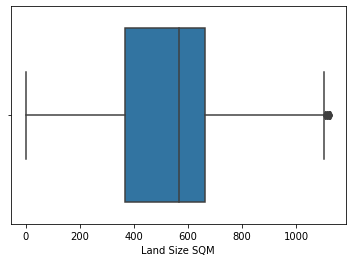

In [ ]:
sns.boxplot(x=X["Land Size SQM"])

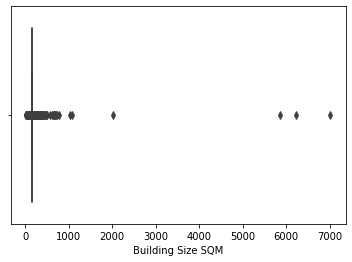

In [ ]:
sns.boxplot(x=X["Building Size SQM"])

In [ ]:
X = X.drop(["Building Size SQM"], axis = 1)

We will drop the column Building Size SQM because it contain a lot of outlier points

In [ ]:
X = X[X["Toilets"] < 4]

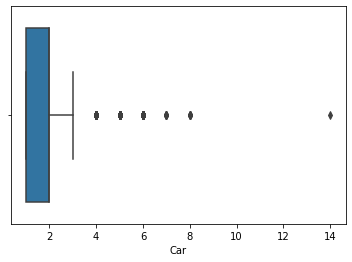

In [ ]:
sns.boxplot(x=X["Car"])

In [ ]:
X = X[X["Car"] < 4]

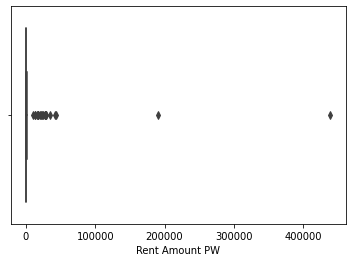

In [ ]:
sns.boxplot(x=X["Rent Amount PW"])

In [ ]:
Q1 = X["Rent Amount PW"].quantile(0.25)
Q3 = X["Rent Amount PW"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
X = X[X["Rent Amount PW"] <= (Q3 + 1.5 * IQR)]

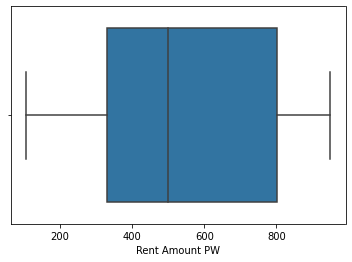

In [ ]:
sns.boxplot(x=X["Rent Amount PW"])

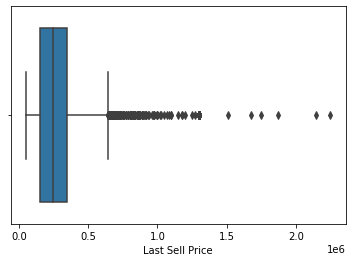

In [ ]:
sns.boxplot(x=X["Last Sell Price"])

In [ ]:
Q1 = X["Last Sell Price"].quantile(0.25)
Q3 = X["Last Sell Price"].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
X = X[X["Last Sell Price"] <= (Q3 + 1.5 * IQR)]

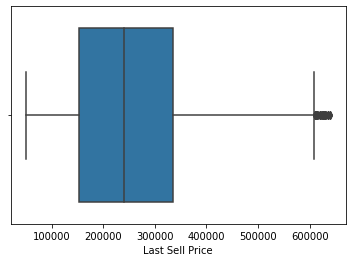

In [ ]:
sns.boxplot(x=X["Last Sell Price"])

In [ ]:
X

,Suburb,Land Size SQM,Bedrooms,Toilets,Car,School,Shop,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Price
0,Armstrong Creek,539.0,4.0,2.0,2.0,4,17,17,4,0,390.000000,0.0,175000.0
1,Armstrong Creek,446.0,4.0,2.0,2.0,5,9,14,3,0,800.847867,0.0,545000.0
2,Armstrong Creek,398.0,4.0,2.0,2.0,2,3,14,4,0,400.000000,0.0,550000.0
4,Armstrong Creek,449.0,4.0,2.0,2.0,1,2,12,3,0,800.847867,0.0,475000.0
5,Armstrong Creek,339.0,3.0,2.0,1.0,4,11,12,4,0,355.000000,0.0,438000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,Whittington,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
10935,Whittington,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0
10937,Whittington,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
10940,Whittington,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0


Address, land size, bedroom, car, rent amount , auction, last sell price

After remove the outliers, the dataset contain 9470 samples with 13 input features. because the feature "Suburb" is a category variable. Therefore, we apply to get dummies for this column.

In [ ]:
#one hot encoding Suburb code
Suburbs = pd.get_dummies(X.Suburb)

In [ ]:
y = y[X.index]

In [ ]:
X = X.reset_index(drop = True)
Suburbs = Suburbs.reset_index(drop=True)

In [ ]:
X = pd.concat([Suburbs, X.drop(["Suburb"], axis = 1)], axis= 1)

In [ ]:
X.to_csv()

,Armstrong Creek,Bell Park,Bell Post Hill,Belmont,BreakWater,Corio,Drumcondra,East Geelong,Freshwater Creek,Geelong,Geelong West,Grovedale,Hamlyn Heights,Herne Hill,Highton,Lara,Manifold Heights,Marshall,Mount Duneed,Newcomb,Newtown,Norlane,North Geelong,North Shore,RippleSide,South Geelong,St Albans Park,Thomson,Wandana Heights,Waurn Ponds,Whittington,Land Size SQM,Bedrooms,Toilets,Car,School,Shop,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Price
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,539.0,4.0,2.0,2.0,4,17,17,4,0,390.000000,0.0,175000.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,446.0,4.0,2.0,2.0,5,9,14,3,0,800.847867,0.0,545000.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,398.0,4.0,2.0,2.0,2,3,14,4,0,400.000000,0.0,550000.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,449.0,4.0,2.0,2.0,1,2,12,3,0,800.847867,0.0,475000.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,339.0,3.0,2.0,1.0,4,11,12,4,0,355.000000,0.0,438000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
9466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0
9467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
9468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0


In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the whole data into the training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(f"the number of sample in the train set is {X_train.shape[0]} sample")
print(f"the number of sample in the test set is {X_test.shape[0]} sample")

the number of sample in the train set is 7576 sample
the number of sample in the test set is 1894 sample


Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

In [ ]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Neural Network

In [ ]:
from tensorflow import keras
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import time

In [ ]:
#Before training the model, some lists are create to store the infomation about model_name, dropout_rate, batch_normalisation, optimizer_style, learning_rate, number_of_epoch, val_accuracy, runningtime of the model.
#After that, one table will be created for model selection.
list_models = []
dropout_rates = []
regularizers_list = []
optimizers = []
learning_rates = []
number_of_epochs = []
val_rmses = []
running_times = []

def store_model(model_name, dropout_rate, regularizer, optimizer_style, learning_rate, number_of_epoch, val_rmse, running_time):
    list_models.append(model_name)
    dropout_rates.append(dropout_rate)
    regularizers_list.append(regularizer)
    optimizers.append(optimizer_style)
    learning_rates.append(learning_rate)
    number_of_epochs.append(number_of_epoch)
    val_rmses.append(val_rmse)
    running_times.append(running_time)

In [ ]:
#Plot function
def plot_performance(history):
  plt.plot(history.history['root_mean_squared_error'])
  plt.plot(history.history['val_root_mean_squared_error'])
  plt.title('RMSE')
  plt.ylabel('RMSE')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
X_train_sm, X_val, y_train_sm, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f"The number of sample in the training set: {len(X_train_sm)}")
print(f"The number of sample in the validation set: {len(X_val)}")

The number of sample in the training set: 6060
The number of sample in the validation set: 1516


In [ ]:
from tensorflow.keras import regularizers

In [ ]:
#Built a new funtion to create new models
#The inputs are:
    #name: The name of model
    #drop_rate: None or one value from 0 to 1
    #batch_ormalisation: True or False
    #optimizer_style: the option of optimizer. {Adam, SGD, RMSprop}
    #learning_rate:the Learning Rate
    #num_epochs: the maximum number of epoches
    #stop_ealy: the number of patientive epoches to stop early

    
    
def new_model(name, dropout_rate, regularizer_type, optimizer_style,learning_rate, num_epochs, stop_early):
    new_model = Sequential()
    #Dense layer 1
    if regularizer_type == "l1":
      new_model.add(Dense(128,input_dim=X_train_sm.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    else:
      new_model.add(Dense(128,input_dim=X_train_sm.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.001)))

    # Add drop out for Dense layer 1
    if dropout_rate:
        new_model.add(layers.Dropout(dropout_rate))
    
    #Dense layer 2
    if regularizer_type == "l1":
      new_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    else:
      new_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    # Add drop out for Dense layer 2
    if dropout_rate:
        new_model.add(layers.Dropout(dropout_rate))

    #Dense layer 3
    if regularizer_type == "l1":
      new_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    else:
      new_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

    # Add drop out for Dense layer 3
    if dropout_rate:
        new_model.add(layers.Dropout(dropout_rate))

    #Dense layer 3
    if regularizer_type == "l1":
      new_model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    else:
      new_model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

    # Add drop out for Dense layer 3
    if dropout_rate:
        new_model.add(layers.Dropout(dropout_rate))

    #output layer
    new_model.add(Dense(1))
    
    print(f"The structure of {name}")
    new_model.summary()

    #Take optimizer
    if  optimizer_style == "Adam":
        optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
    elif  optimizer_style == "SGD":
        optimizer = tf.keras.optimizers.SGD(lr = learning_rate, momentum = 0.9)
    elif  optimizer_style == "RMSprop":
        optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate)
    
    #Stop early
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=stop_early)

    #Save the weight of best model
    save_model = ModelCheckpoint(f'../content/bestmodel/{name}', monitor="val_root_mean_squared_error", verbose=0, save_best_only=True, mode='min')
    new_model.compile(optimizer=optimizer, loss='MSE',
              metrics = tf.keras.metrics.RootMeanSquaredError())
    num_epochs = 1000
    start_time = time.time()
    #Train the new model
    new_model_history = new_model.fit(
    x=X_train_sm,y=y_train_sm,
    epochs=num_epochs,
    batch_size = 64,
    validation_data = (X_val,y_val),
    callbacks=[stop_early, save_model])
    running_time = time.time() - start_time
    
    #Show the perfromance of model
    val_rmse= new_model_history.history["val_root_mean_squared_error"]
  
    mix_index = np.argmin(val_rmse)
    
    #Save the parameter of model
    store_model(name, dropout_rate, regularizer_type, optimizer_style, learning_rate, mix_index+1,val_rmse[mix_index], running_time)

    #Plot the loss and accuracy on the trainning set and test set
    plot_performance(new_model_history)
    print(f"The best RMSE of {name} is {val_rmse[mix_index]} at epoch {mix_index+1}") 
    return new_model

The structure of neural_network_1
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               5632      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 137,473
Trainable params: 137,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
95/95 [==============================] - 1s 6ms/step - loss: 314216

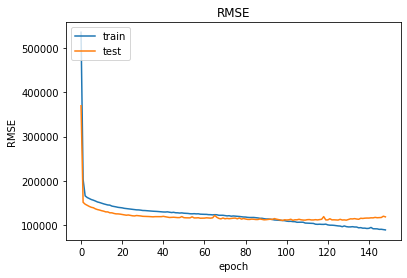

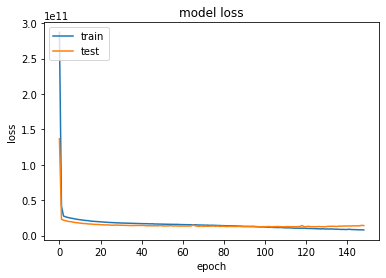

The best RMSE of neural_network_1 is 110491.6484375 at epoch 99


In [ ]:
model_1 = new_model("neural_network_1", False, "l1", "Adam", 0.001, 1000, 50)

The structure of neural_network_2
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               5632      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 137,473
Trainable params: 137,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
95/95 [==============================] - 1s 6ms/step - loss: 166318

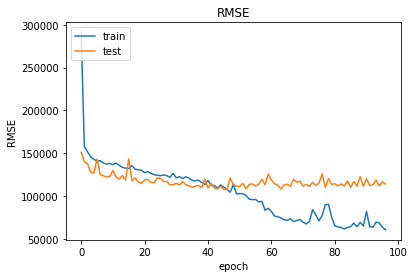

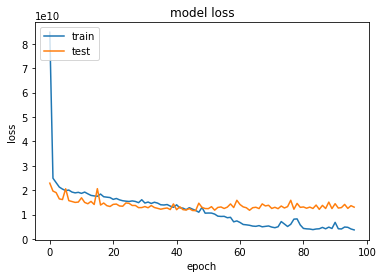

The best RMSE of neural_network_2 is 107619.5390625 at epoch 47


In [ ]:
model_2 = new_model("neural_network_2", False, "l2",  "Adam", 0.01, 1000, 50)

The structure of neural_network_3
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)    

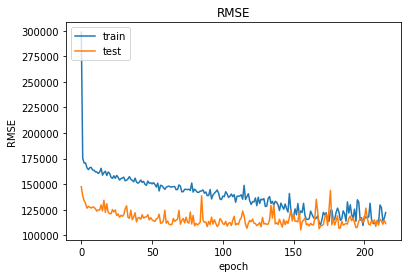

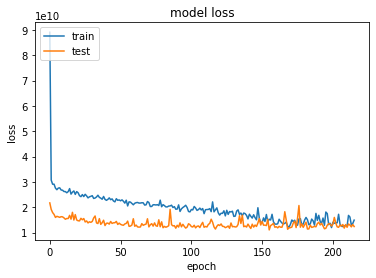

The best RMSE of neural_network_3 is 105234.1796875 at epoch 156


In [ ]:
model_3 = new_model("neural_network_3", 0.3, "l1", "Adam", 0.01, 1000, 60)

The structure of neural_network_4
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)    

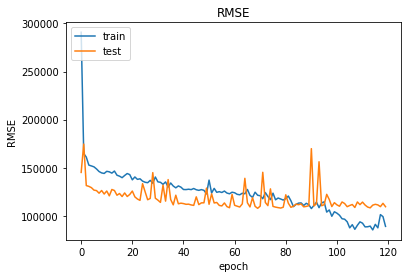

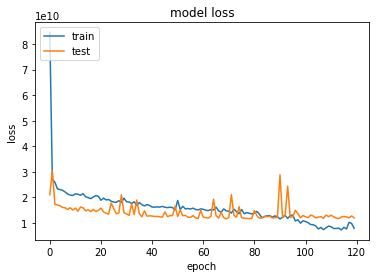

The best RMSE of neural_network_4 is 107798.4375 at epoch 70


In [ ]:
model_4 = new_model("neural_network_4", 0.1, "l2", "Adam", 0.01, 1000, 50)

The structure of neural_network_5
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)    

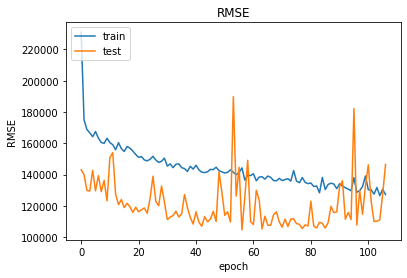

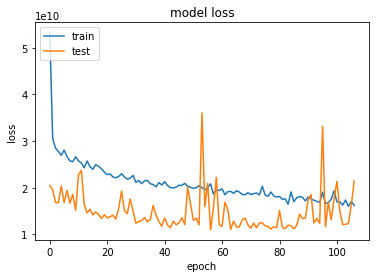

The best RMSE of neural_network_5 is 104577.109375 at epoch 57


In [ ]:
model_5 = new_model("neural_network_5", 0.2, "l1", "RMSprop", 0.01, 1000, 50)

The structure of neural_network_6
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)    

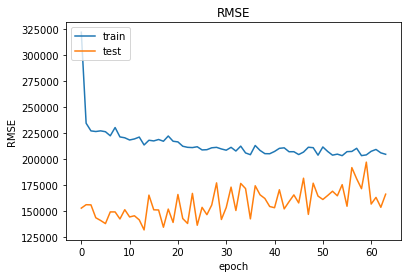

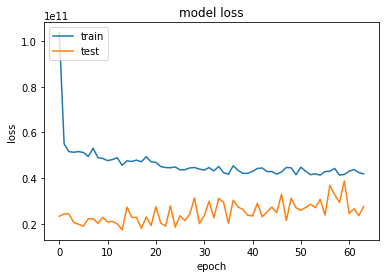

The best RMSE of neural_network_6 is 131628.375 at epoch 14


In [ ]:
model_6 = new_model("neural_network_6", 0.7, "l2", "Adam", 0.01, 1000, 50)

The structure of neural_network_7
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)    

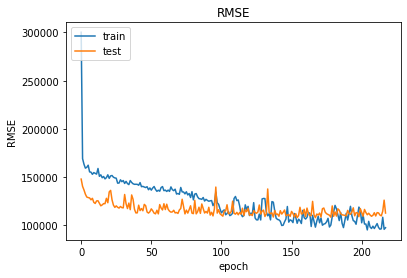

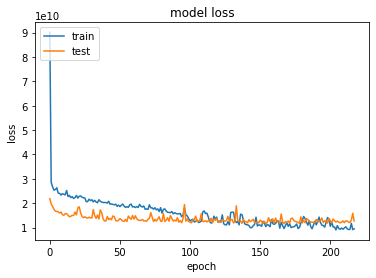

The best RMSE of neural_network_7 is 107942.8515625 at epoch 168


In [ ]:
model_7 = new_model("neural_network_7", 0.2, "l1", "Adam", 0.01, 1000, 50)

The structure of neural_network_8
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_53 (Dense)   

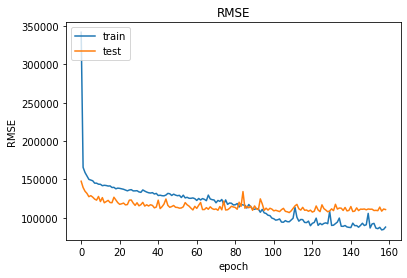

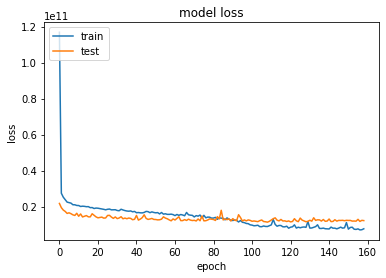

The best RMSE of neural_network_8 is 106697.5390625 at epoch 109


In [ ]:
model_8 = new_model("neural_network_8", 0.1, "l1", "Adam", 0.005, 1000, 50)

The structure of neural_network_9
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)   

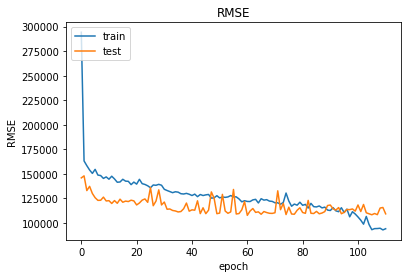

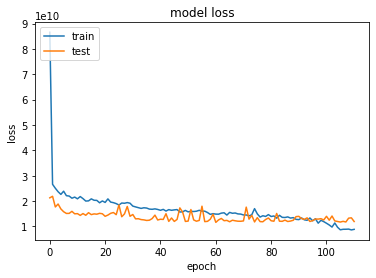

The best RMSE of neural_network_9 is 107704.421875 at epoch 61


In [ ]:
model_9 = new_model("neural_network_9", 0.1, "l2", "Adam", 0.01, 1000, 50)

The structure of neural_network_10
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)  

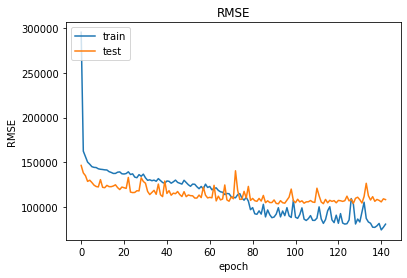

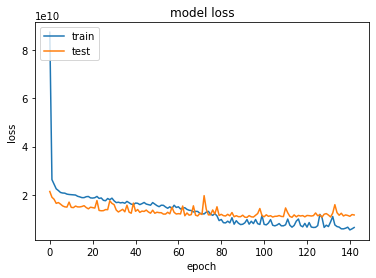

The best RMSE of neural_network_10 is 103235.484375 at epoch 93


In [ ]:
model_10 = new_model("neural_network_10", 0.05, "l2", "Adam", 0.01, 1000, 50)

The structure of neural_network_11
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)  

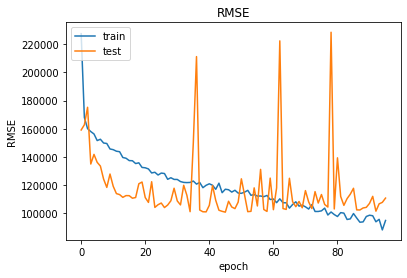

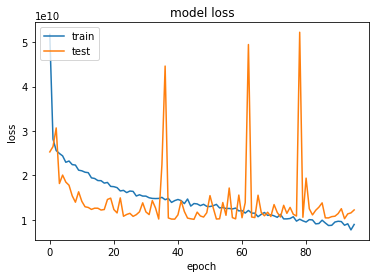

The best RMSE of neural_network_11 is 100726.4765625 at epoch 46


In [ ]:
model_11 = new_model("neural_network_11", 0.05, "l2", "RMSprop", 0.01, 1000, 50)

The structure of neural_network_12
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_73 (Dense)  

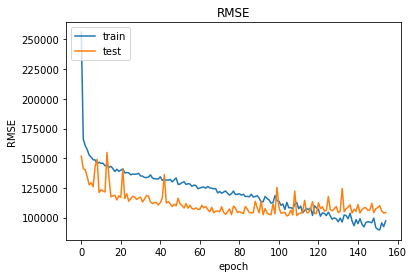

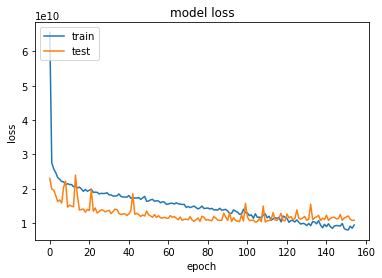

The best RMSE of neural_network_12 is 101400.9375 at epoch 105


In [ ]:
model_12 = new_model("neural_network_12", 0.1, "l2", "RMSprop", 0.005, 1000, 50)

The structure of neural_network_13
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)  

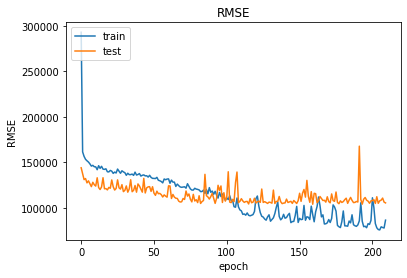

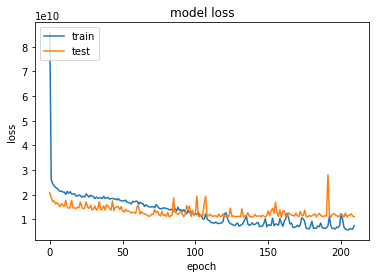

The best RMSE of neural_network_13 is 103903.1015625 at epoch 160


In [ ]:
model_13 = new_model("neural_network_13", 0.1, "l1", "Adam", 0.01, 1000, 50)

The structure of neural_network_14
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)  

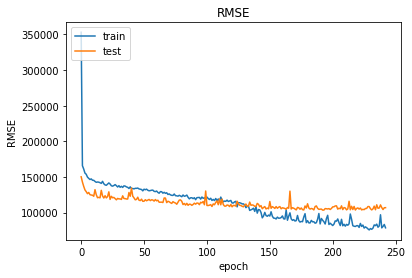

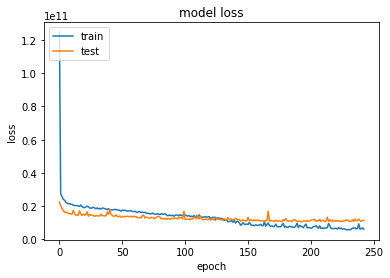

The best RMSE of neural_network_14 is 103387.03125 at epoch 193


In [ ]:
model_14 = new_model("neural_network_14", 0.1, "l1", "Adam", 0.005, 1000, 50)

The structure of neural_network_15
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_49 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_50 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)  

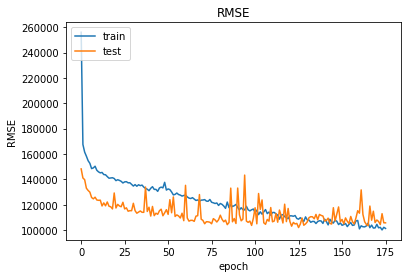

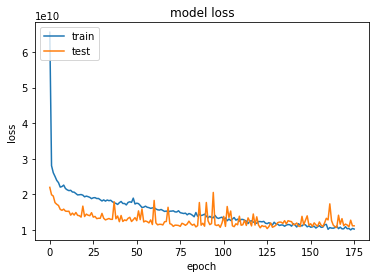

The best RMSE of neural_network_15 is 101995.8203125 at epoch 126


In [ ]:
model_15 = new_model("neural_network_15", 0.1, "l1", "RMSprop", 0.005, 1000, 50)

The structure of neural_network_16
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_52 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_54 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)  

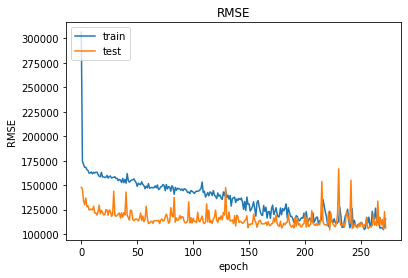

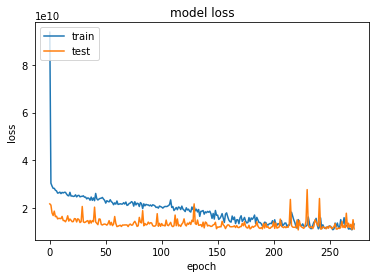

The best RMSE of neural_network_16 is 104318.171875 at epoch 223


In [ ]:
model_16 = new_model("neural_network_16", 0.3, "l1", "Adam", 0.01, 1000, 50)

The structure of neural_network_17
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_57 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)  

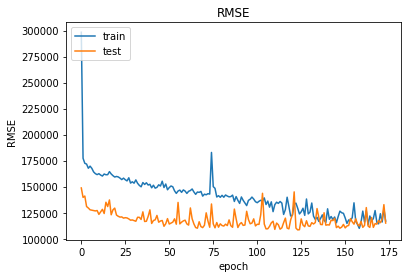

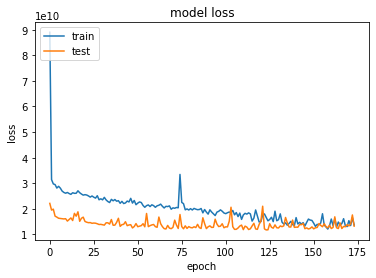

The best RMSE of neural_network_17 is 108436.0 at epoch 124


In [ ]:
model_17 = new_model("neural_network_17", 0.3, "l1", "Adam", 0.01, 1000, 50)

The structure of neural_network_18
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 128)               5632      
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_103 (Dense) 

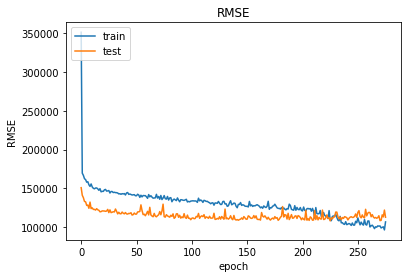

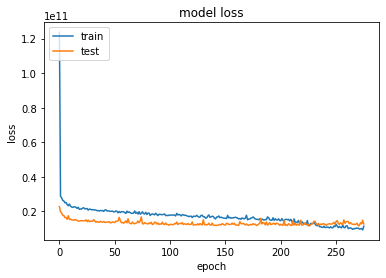

The best RMSE of neural_network_18 is 108089.484375 at epoch 226


In [ ]:
model_18 = new_model("neural_network_18", 0.2, "l2", "Adam", 0.005, 1000, 50)

The structure of neural_network_19
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               5632      
_________________________________________________________________
dropout_64 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_65 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_66 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_108 (Dense) 

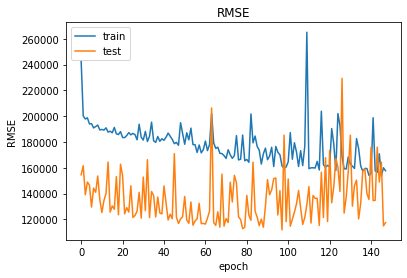

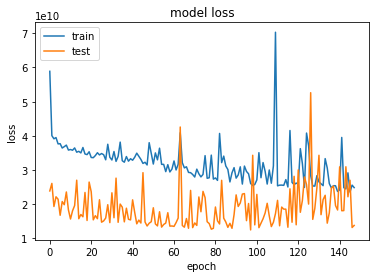

The best RMSE of neural_network_19 is 111757.4921875 at epoch 98


In [ ]:
model_19 = new_model("neural_network_19", 0.5, "l2", "RMSprop", 0.01, 1000, 50)

The structure of neural_network_20
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 128)               5632      
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_74 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_118 (Dense) 

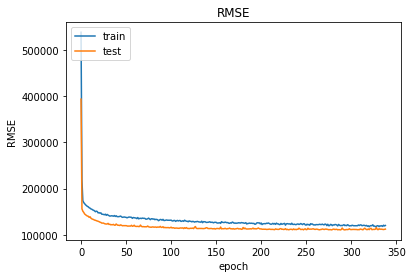

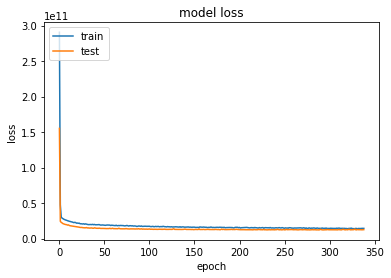

The best RMSE of neural_network_20 is 110296.1328125 at epoch 289


In [ ]:
model_20 = new_model("neural_network_20", 0.1, "l2", "Adam", 0.001, 1000, 50)

In [ ]:
table = pd.DataFrame([])
table["Model"] = list_models
table["Dropout (rate)"] = dropout_rates
table["regularizer"] = regularizers_list
table["Optimizer"] = optimizers
table["Learning Rate"] = learning_rates
table["Number of Epochs"] = number_of_epochs
table["Running time (s)"] = running_times
table["RMSE"] = val_rmses 
table  = table.fillna(0)
table

,Model,Dropout (rate),regularizer,Optimizer,Learning Rate,Number of Epochs,Running time (s),RMSE
0,neural_network_1,False,l1,Adam,0.001,99,118.076343,110491.648438
1,neural_network_2,False,l2,Adam,0.010,47,62.004949,107619.539062
2,neural_network_3,0.3,l1,Adam,0.010,156,150.576023,105234.179688
3,neural_network_4,0.1,l2,Adam,0.010,70,91.941712,107798.437500
4,neural_network_5,0.2,l1,RMSprop,0.010,57,76.003950,104577.109375
5,neural_network_6,0.7,l2,Adam,0.010,14,39.371866,131628.375000
6,neural_network_7,0.2,l1,Adam,0.010,168,167.439695,107942.851562
7,neural_network_8,0.1,l1,Adam,0.005,109,123.644522,106697.539062
8,neural_network_9,0.1,l2,Adam,0.010,61,83.704672,107704.421875
9,neural_network_10,0.05,l2,Adam,0.010,93,109.464370,103235.484375


Because the accuracy of the model is not high in this data set. so we will optimize the model on the previous data

In [7]:
min_mae = np.argmin(val_rmses)
print(f"The best model is neural_network_11 with the Roor Mean Square Error is 100726.476562")
final_model =tf.keras.models.load_model(f'../content/bestmodel/{list_models[min_mae]}/')
print("the structure of the final model")
final_model.summary()

The best model is neural_network_11 with the Roor Mean Square Error is 100726.476562
the structure of the final model
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_

The best model has:
  - 3 hidden layers with 128, 256, 128 nodes, respectively.
  - 3 dropout layers with dropout_rate = 0.1
  - regularizer type is l2 with  lambda  = 0.001
  - optimizer is the Adam algorithm with learning rate is 0.01
  - Number of Epochs is 91
  - metric is RMSE

In [ ]:
y_pred = final_model.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])

y_pred = [i for i in y_pred]

In [ ]:
#calculate the MAE and RMSE

MAE = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error (MAE): {round(MAE,2)} dollars")
RMSE =  metrics.mean_squared_error(y_test, y_pred, squared=False)
print(f"Root mean squared error: {round(RMSE,2)} dollars")

Mean absolute error (MAE): 57696.49 dollars
Root mean squared error: 108049.92 dollars


| Model | RMSE |
| --- | --- |
| Model T1 2021 (Iteration 2) |  108050 |
| Model T2 2020 |   204,316 |


Comparing to the model from T2 2020, the root mean squared error of our model reduces 50%. Therefore, the model in this project is better than the model from T2 2020.



In [5]:
final_model =tf.keras.models.load_model(f'drive/MyDrive/SIT764/Property/model/model_2')

In [ ]:
final_model.save('drive/MyDrive/SIT764/Property/model/my_model.h5')